In [25]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
import numpy as np
import matplotlib.pyplot as plt
from get_time_interval_data import *
from PCA import *
from Plot import *
from sklearn.cluster import KMeans
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
exp_data_c2  = get_time_interval_matrix_data('Nov 3 2020 04:00PM', 'Nov 3 2020 04:04PM')
exp_data_c3  = get_time_interval_matrix_data('Nov 3 2020 04:05PM', 'Nov 3 2020 04:09PM')
exp_data_c4  = get_time_interval_matrix_data('Nov 3 2020 04:10PM', 'Nov 3 2020 04:14PM')
exp_data_c5  = get_time_interval_matrix_data('Nov 3 2020 04:15PM', 'Nov 3 2020 04:19PM')
exp_data_c1  = get_time_interval_matrix_data('Nov 3 2020 04:20PM', 'Nov 3 2020 04:24PM')

In [35]:
exp_clean_data_ls = [exp_data_c2,exp_data_c3,exp_data_c4,exp_data_c5,exp_data_c1]

In [38]:
exp_clean_data = np.vstack(exp_clean_data_ls)

In [40]:
# Models are imported from PCA, directly use call EIGEN_VALUES_0819, EIGEN_VECTORS_0918
exp_clean_cdata = get_cdata(exp_clean_data)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


In [42]:
projection= project_to_eigen_vectors(exp_clean_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

In [50]:
projection.shape

(18458, 2)

In [58]:
dim = [exp_data_c2.shape[0],
       exp_data_c3.shape[0],
       exp_data_c4.shape[0],
       exp_data_c5.shape[0],
       exp_data_c1.shape[0]]

dim_sum = [int(np.sum(dim[:i])) for i in range(6)]

In [66]:
fixed_points  = get_time_interval_matrix_data('Oct 13 2020 02:30PM', 'Oct 13 2020 02:40PM')

In [70]:
fixed_points_cdata = get_cdata(fixed_points)
fixed_points_projection = project_to_eigen_vectors(fixed_points_cdata,2,EIGEN_VALUES_0819,EIGEN_VECTORS_0819)

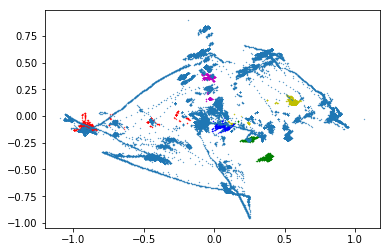

In [72]:
color_ls = ['r','b','g','y','m']
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(6):
    if i == 5:
        ax.scatter(fixed_points_projection[:,0],fixed_points_projection[:,1],s=0.1)
    else:
        ax.scatter(projection[dim_sum[i]:dim_sum[i+1],0],projection[dim_sum[i]:dim_sum[i+1],1],c=color_ls[i], s=0.1)

In [69]:
fig.show()